<a href="https://colab.research.google.com/github/drscghosh/Testing/blob/master/Distribution_Function_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Summary Statistics for Age:
count    1000.000000
mean       35.193321
std         9.792159
min         2.587327
25%        28.524097
50%        35.253006
75%        41.479439
max        73.527315
Name: Age, dtype: float64
Skewness: 0.12
Kurtosis: 0.07


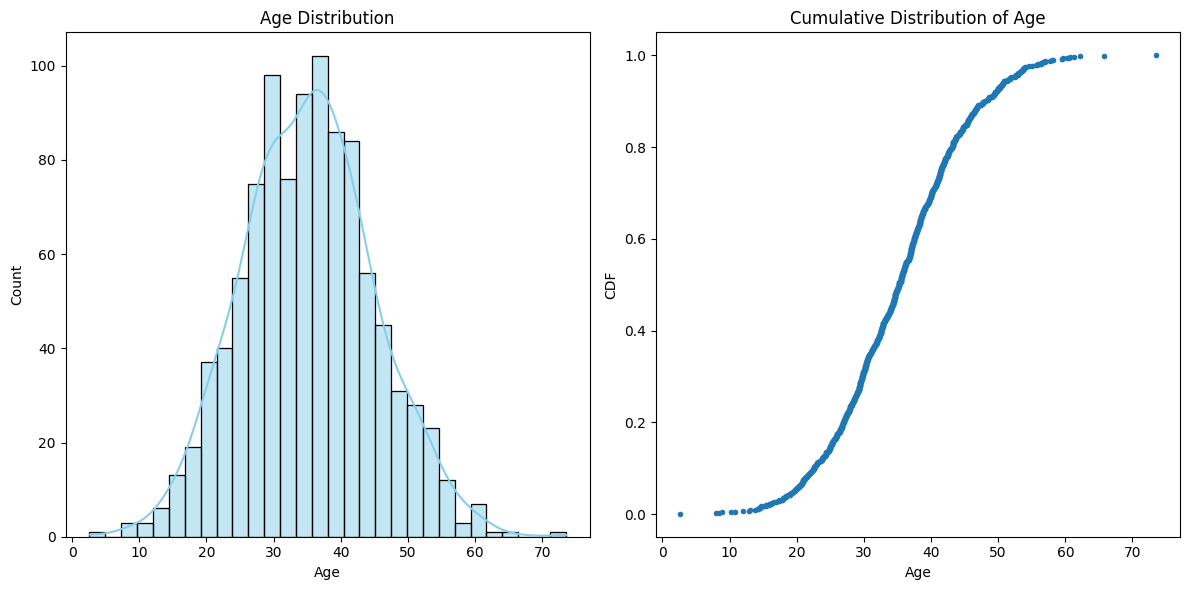


Summary Statistics for Income:
count      1000.000000
mean      50399.296685
std       50149.425449
min         161.172668
25%       14197.725844
50%       36296.561034
75%       68584.212653
max      372086.145485
Name: Income, dtype: float64
Skewness: 1.98
Kurtosis: 5.41


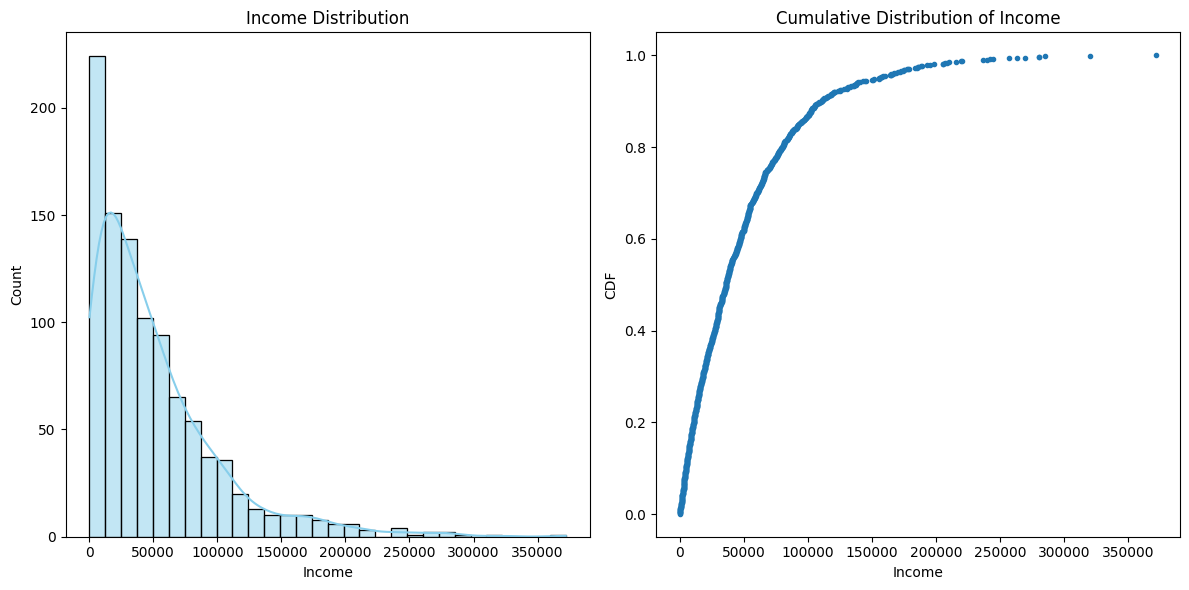

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# -------------------------------
# Step 1: Create a Sample Database
# -------------------------------
np.random.seed(42)
data_size = 1000

# Simulate a sample dataset
# sample_data = pd.read_csv('your_file.csv')
sample_data = pd.DataFrame({
    'ID': range(1, data_size + 1),
    'Age': np.random.normal(loc=35, scale=10, size=data_size),  # Normally distributed ages
    'Income': np.random.exponential(scale=50000, size=data_size),  # Skewed income data
})

# -------------------------------
# Step 2: Summary Statistics
# -------------------------------
def summarize_distribution(data, column):
    print(f"\nSummary Statistics for {column}:")
    print(data[column].describe())
    print(f"Skewness: {data[column].skew():.2f}")
    print(f"Kurtosis: {data[column].kurt():.2f}")

# -------------------------------
# Step 3: Plot Distribution
# -------------------------------
def plot_distribution(data, column):
    plt.figure(figsize=(12, 6))

    # Histogram and KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], bins=30, kde=True, color='skyblue')
    plt.title(f'{column} Distribution')

    # Cumulative Distribution
    plt.subplot(1, 2, 2)
    sorted_data = np.sort(data[column])
    y = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, y, marker='.', linestyle='none')
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.title(f'Cumulative Distribution of {column}')

    plt.tight_layout()
    plt.show()

# -------------------------------
# Step 4: Run Analysis
# -------------------------------
if __name__ == "__main__":
    summarize_distribution(sample_data, 'Age')
    plot_distribution(sample_data, 'Age')

    summarize_distribution(sample_data, 'Income')
    plot_distribution(sample_data, 'Income')
